In [2]:
!pip install koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 27.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
# 노트북 안에서 그래프를 디스플레이 하겠다. 
%matplotlib inline

# 시각화를 위한 폰트 설정 
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
# 노트북 안에서 그래프를 디스플레이 하겠다. 
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip '/content/drive/MyDrive/Colab Notebooks/미드 프로젝트 2/235745_parking_data.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/미드 프로젝트 2/235745_parking_data.zip
  inflating: age_gender_info.csv     
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [76]:
base_path = "."
# train 변수에 train.csv 데이터를 불러옵니다.
# test 변수에 test.csv 데이터를 불러옵니다.
# submission 변수에 sample_submission.csv 데이터를 불러옵니다.
train = pd.read_csv(f'{base_path}/train.csv', index_col="지역")
test = pd.read_csv(f'{base_path}/test.csv', index_col="지역")
age_gender = pd.read_csv(f'{base_path}/age_gender_info.csv', index_col="지역")

train.shape, test.shape, age_gender.shape

((2952, 14), (1022, 13), (16, 22))

In [7]:
train.head()

,단지코드,총세대수,임대건물구분,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
지역,,,,,,,,,,,,,,
경상북도,C2483,900,아파트,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
경상북도,C2483,900,아파트,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
경상북도,C2483,900,아파트,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
경상북도,C2483,900,아파트,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
경상북도,C2483,900,아파트,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [8]:
test.head()

,단지코드,총세대수,임대건물구분,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
지역,,,,,,,,,,,,,
경기도,C1072,754,아파트,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
경기도,C1072,754,아파트,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
경기도,C1072,754,아파트,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
경기도,C1072,754,아파트,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
경기도,C1072,754,아파트,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


In [9]:
set(train['임대건물구분'])

{'상가', '아파트'}

In [10]:
set(train['공급유형'])

{'공공분양',
 '공공임대(10년)',
 '공공임대(50년)',
 '공공임대(5년)',
 '공공임대(분납)',
 '국민임대',
 '영구임대',
 '임대상가',
 '장기전세',
 '행복주택'}

In [11]:
set(train['전용면적'])

{12.62,
 14.1,
 14.17,
 15.0,
 16.0,
 16.02,
 16.27,
 16.29,
 16.34,
 16.45,
 16.57,
 16.64,
 16.67,
 16.71,
 16.75,
 16.76,
 16.77,
 16.8,
 16.84,
 16.85,
 16.87,
 16.89,
 16.9,
 16.91,
 16.92,
 16.95,
 16.97,
 16.99,
 17.4,
 18.38,
 18.9,
 18.98,
 19.0,
 19.15,
 19.25,
 19.31,
 19.36,
 19.69,
 20.52,
 20.9,
 21.19,
 21.43,
 21.46,
 21.54,
 21.56,
 21.63,
 21.72,
 21.78,
 21.81,
 21.84,
 21.85,
 21.86,
 21.88,
 21.9,
 21.94,
 21.95,
 21.96,
 21.97,
 21.98,
 21.99,
 22.24,
 22.83,
 22.89,
 22.95,
 22.97,
 23.13,
 23.25,
 23.32,
 23.35,
 23.4,
 23.48,
 23.54,
 23.76,
 23.8,
 23.86,
 23.88,
 23.89,
 23.91,
 23.92,
 23.93,
 24.38,
 24.43,
 24.71,
 24.72,
 24.74,
 24.75,
 24.76,
 24.77,
 24.79,
 24.83,
 24.86,
 24.95,
 24.96,
 24.97,
 24.98,
 25.88,
 25.98,
 26.04,
 26.07,
 26.11,
 26.12,
 26.17,
 26.19,
 26.24,
 26.25,
 26.26,
 26.27,
 26.34,
 26.37,
 26.4,
 26.42,
 26.44,
 26.47,
 26.49,
 26.51,
 26.52,
 26.53,
 26.54,
 26.58,
 26.6,
 26.61,
 26.62,
 26.64,
 26.65,
 26.66,
 26.67,
 26.68

In [12]:
set(train['단지코드'])

{'C1000',
 'C1004',
 'C1005',
 'C1013',
 'C1014',
 'C1015',
 'C1017',
 'C1022',
 'C1024',
 'C1026',
 'C1027',
 'C1032',
 'C1036',
 'C1039',
 'C1045',
 'C1046',
 'C1048',
 'C1049',
 'C1056',
 'C1057',
 'C1059',
 'C1065',
 'C1068',
 'C1077',
 'C1084',
 'C1085',
 'C1089',
 'C1095',
 'C1102',
 'C1103',
 'C1109',
 'C1122',
 'C1129',
 'C1131',
 'C1133',
 'C1136',
 'C1141',
 'C1143',
 'C1155',
 'C1156',
 'C1163',
 'C1171',
 'C1173',
 'C1175',
 'C1176',
 'C1177',
 'C1180',
 'C1184',
 'C1194',
 'C1206',
 'C1207',
 'C1210',
 'C1213',
 'C1218',
 'C1227',
 'C1234',
 'C1236',
 'C1244',
 'C1258',
 'C1263',
 'C1268',
 'C1269',
 'C1281',
 'C1284',
 'C1286',
 'C1301',
 'C1307',
 'C1309',
 'C1310',
 'C1312',
 'C1316',
 'C1319',
 'C1320',
 'C1326',
 'C1328',
 'C1329',
 'C1338',
 'C1340',
 'C1341',
 'C1343',
 'C1344',
 'C1350',
 'C1357',
 'C1360',
 'C1363',
 'C1365',
 'C1368',
 'C1375',
 'C1379',
 'C1386',
 'C1394',
 'C1397',
 'C1402',
 'C1406',
 'C1407',
 'C1410',
 'C1424',
 'C1426',
 'C1428',
 'C1430',


In [13]:

set(train['자격유형'])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'}

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2952 entries, 경상북도 to 강원도
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   공급유형                          2952 non-null   object 
 4   전용면적                          2952 non-null   float64
 5   전용면적별세대수                      2952 non-null   int64  
 6   공가수                           2952 non-null   float64
 7   자격유형                          2952 non-null   object 
 8   임대보증금                         2383 non-null   object 
 9   임대료                           2383 non-null   object 
 10  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 11  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 12  단지내주차면수                       2952 non-null   float64
 13  등록차량수 

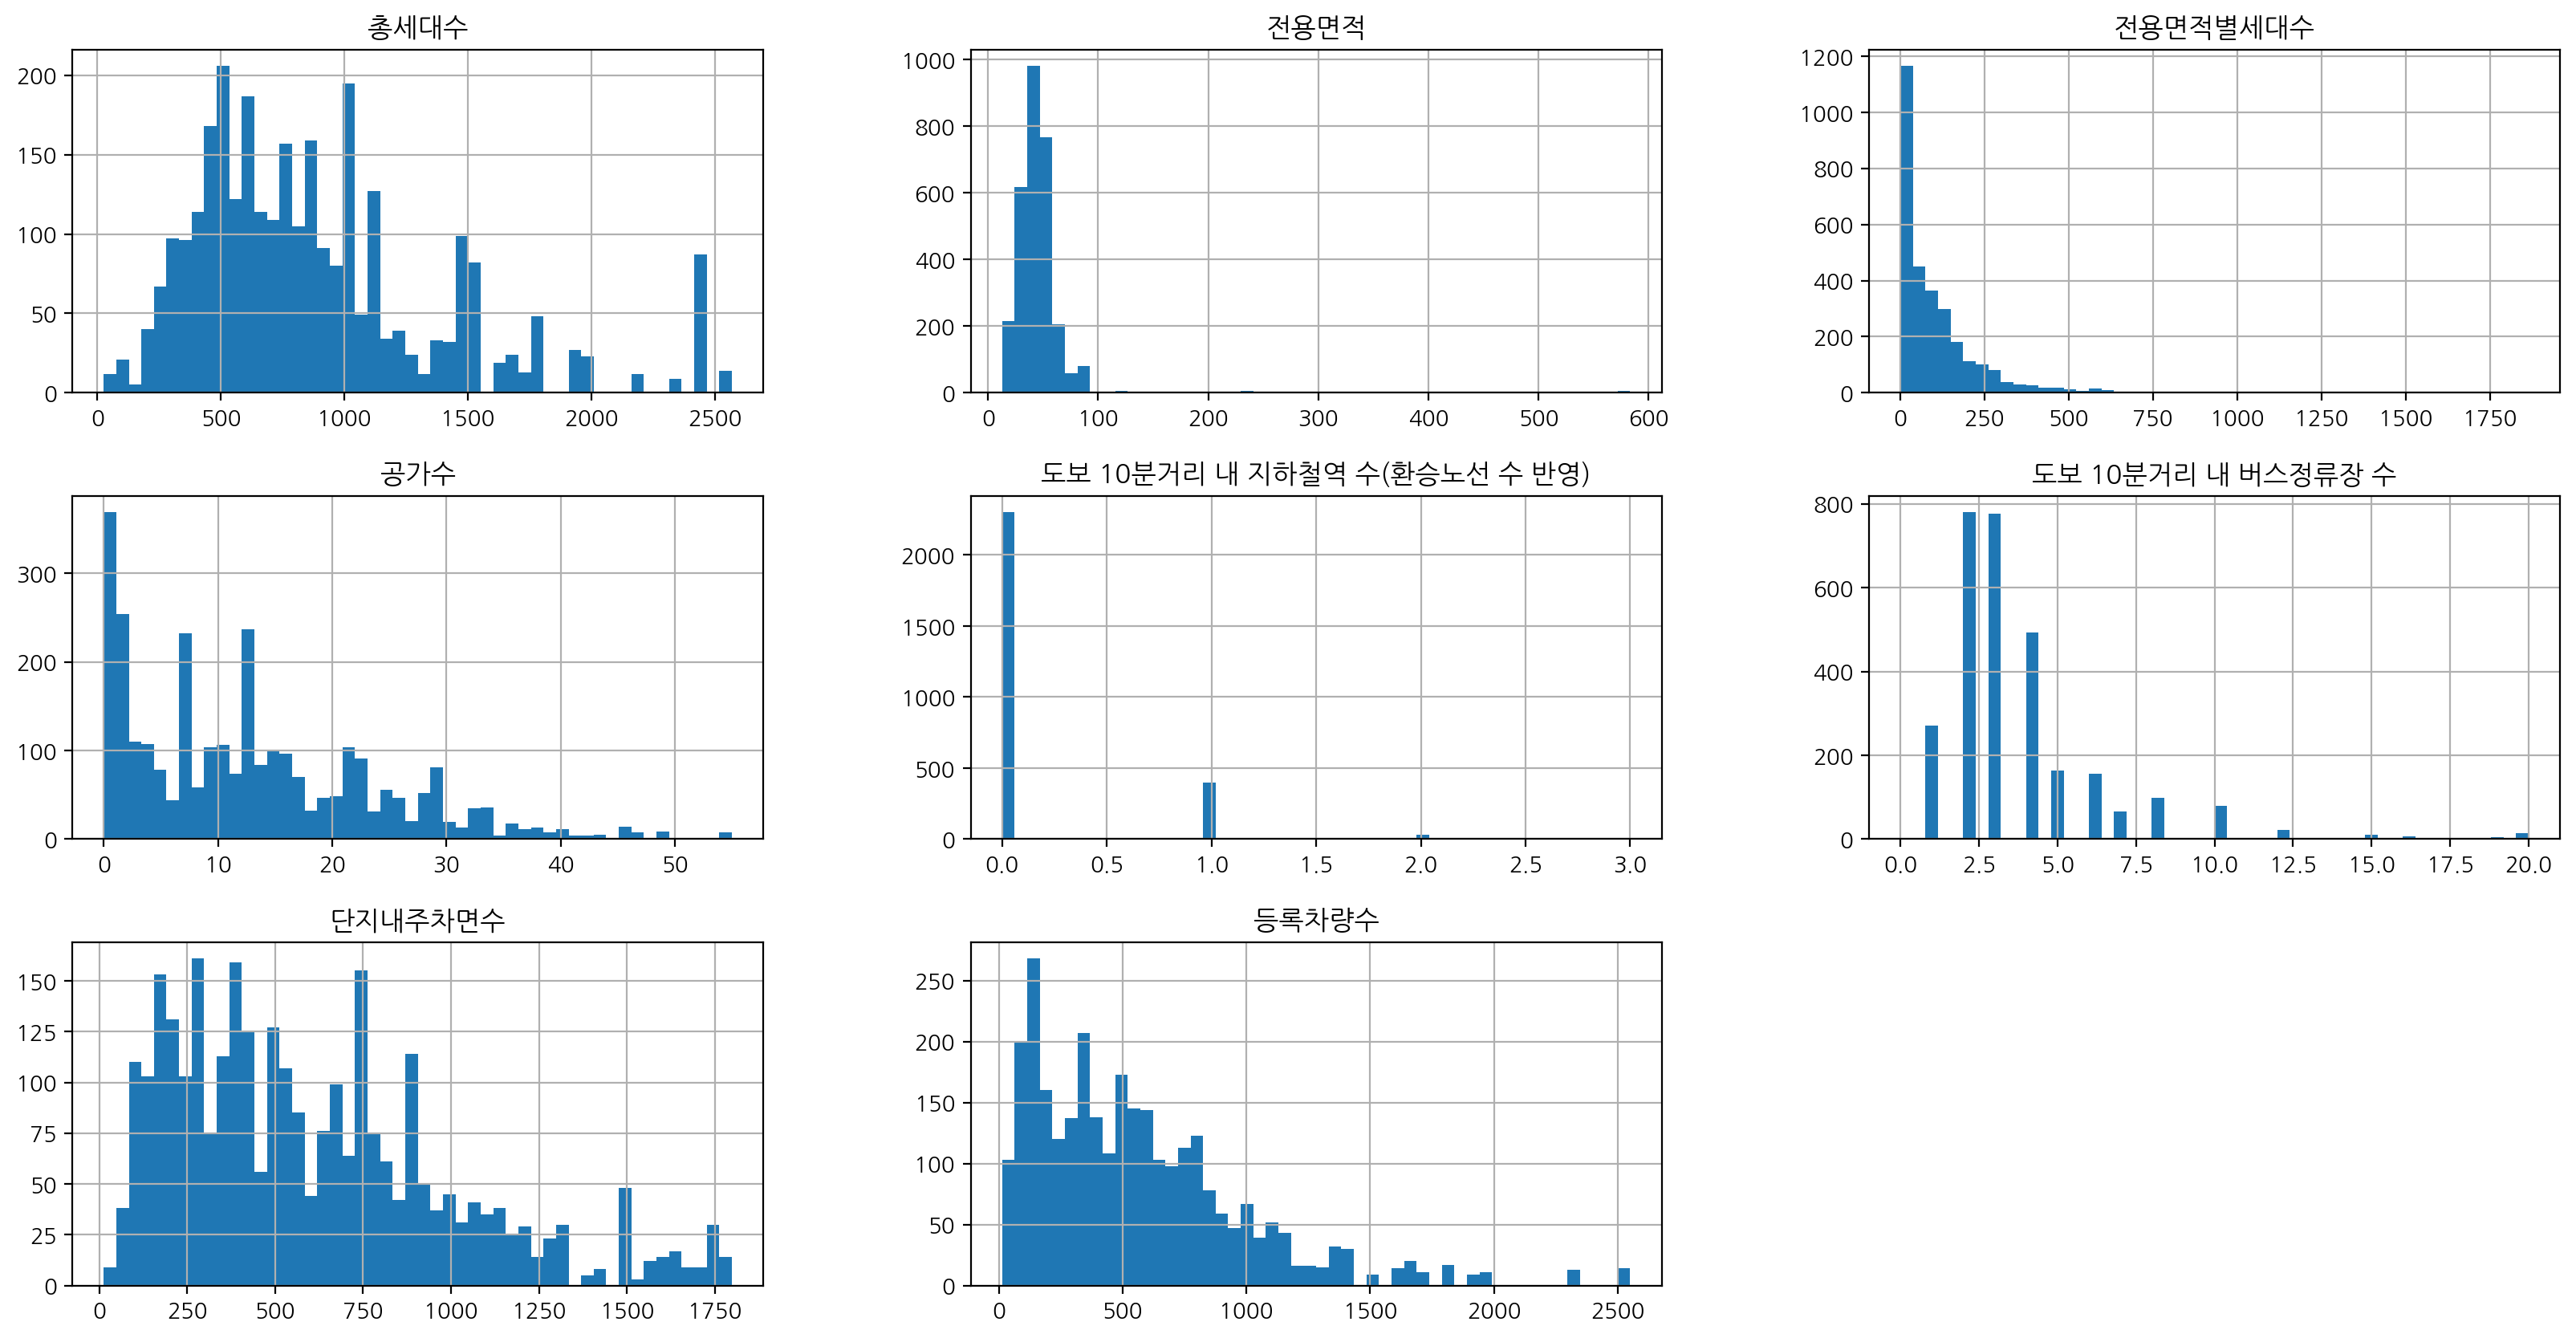

In [15]:
train.hist(bins=50,figsize=(20, 10))
plt.show();

# 상관계수

<Axes: >

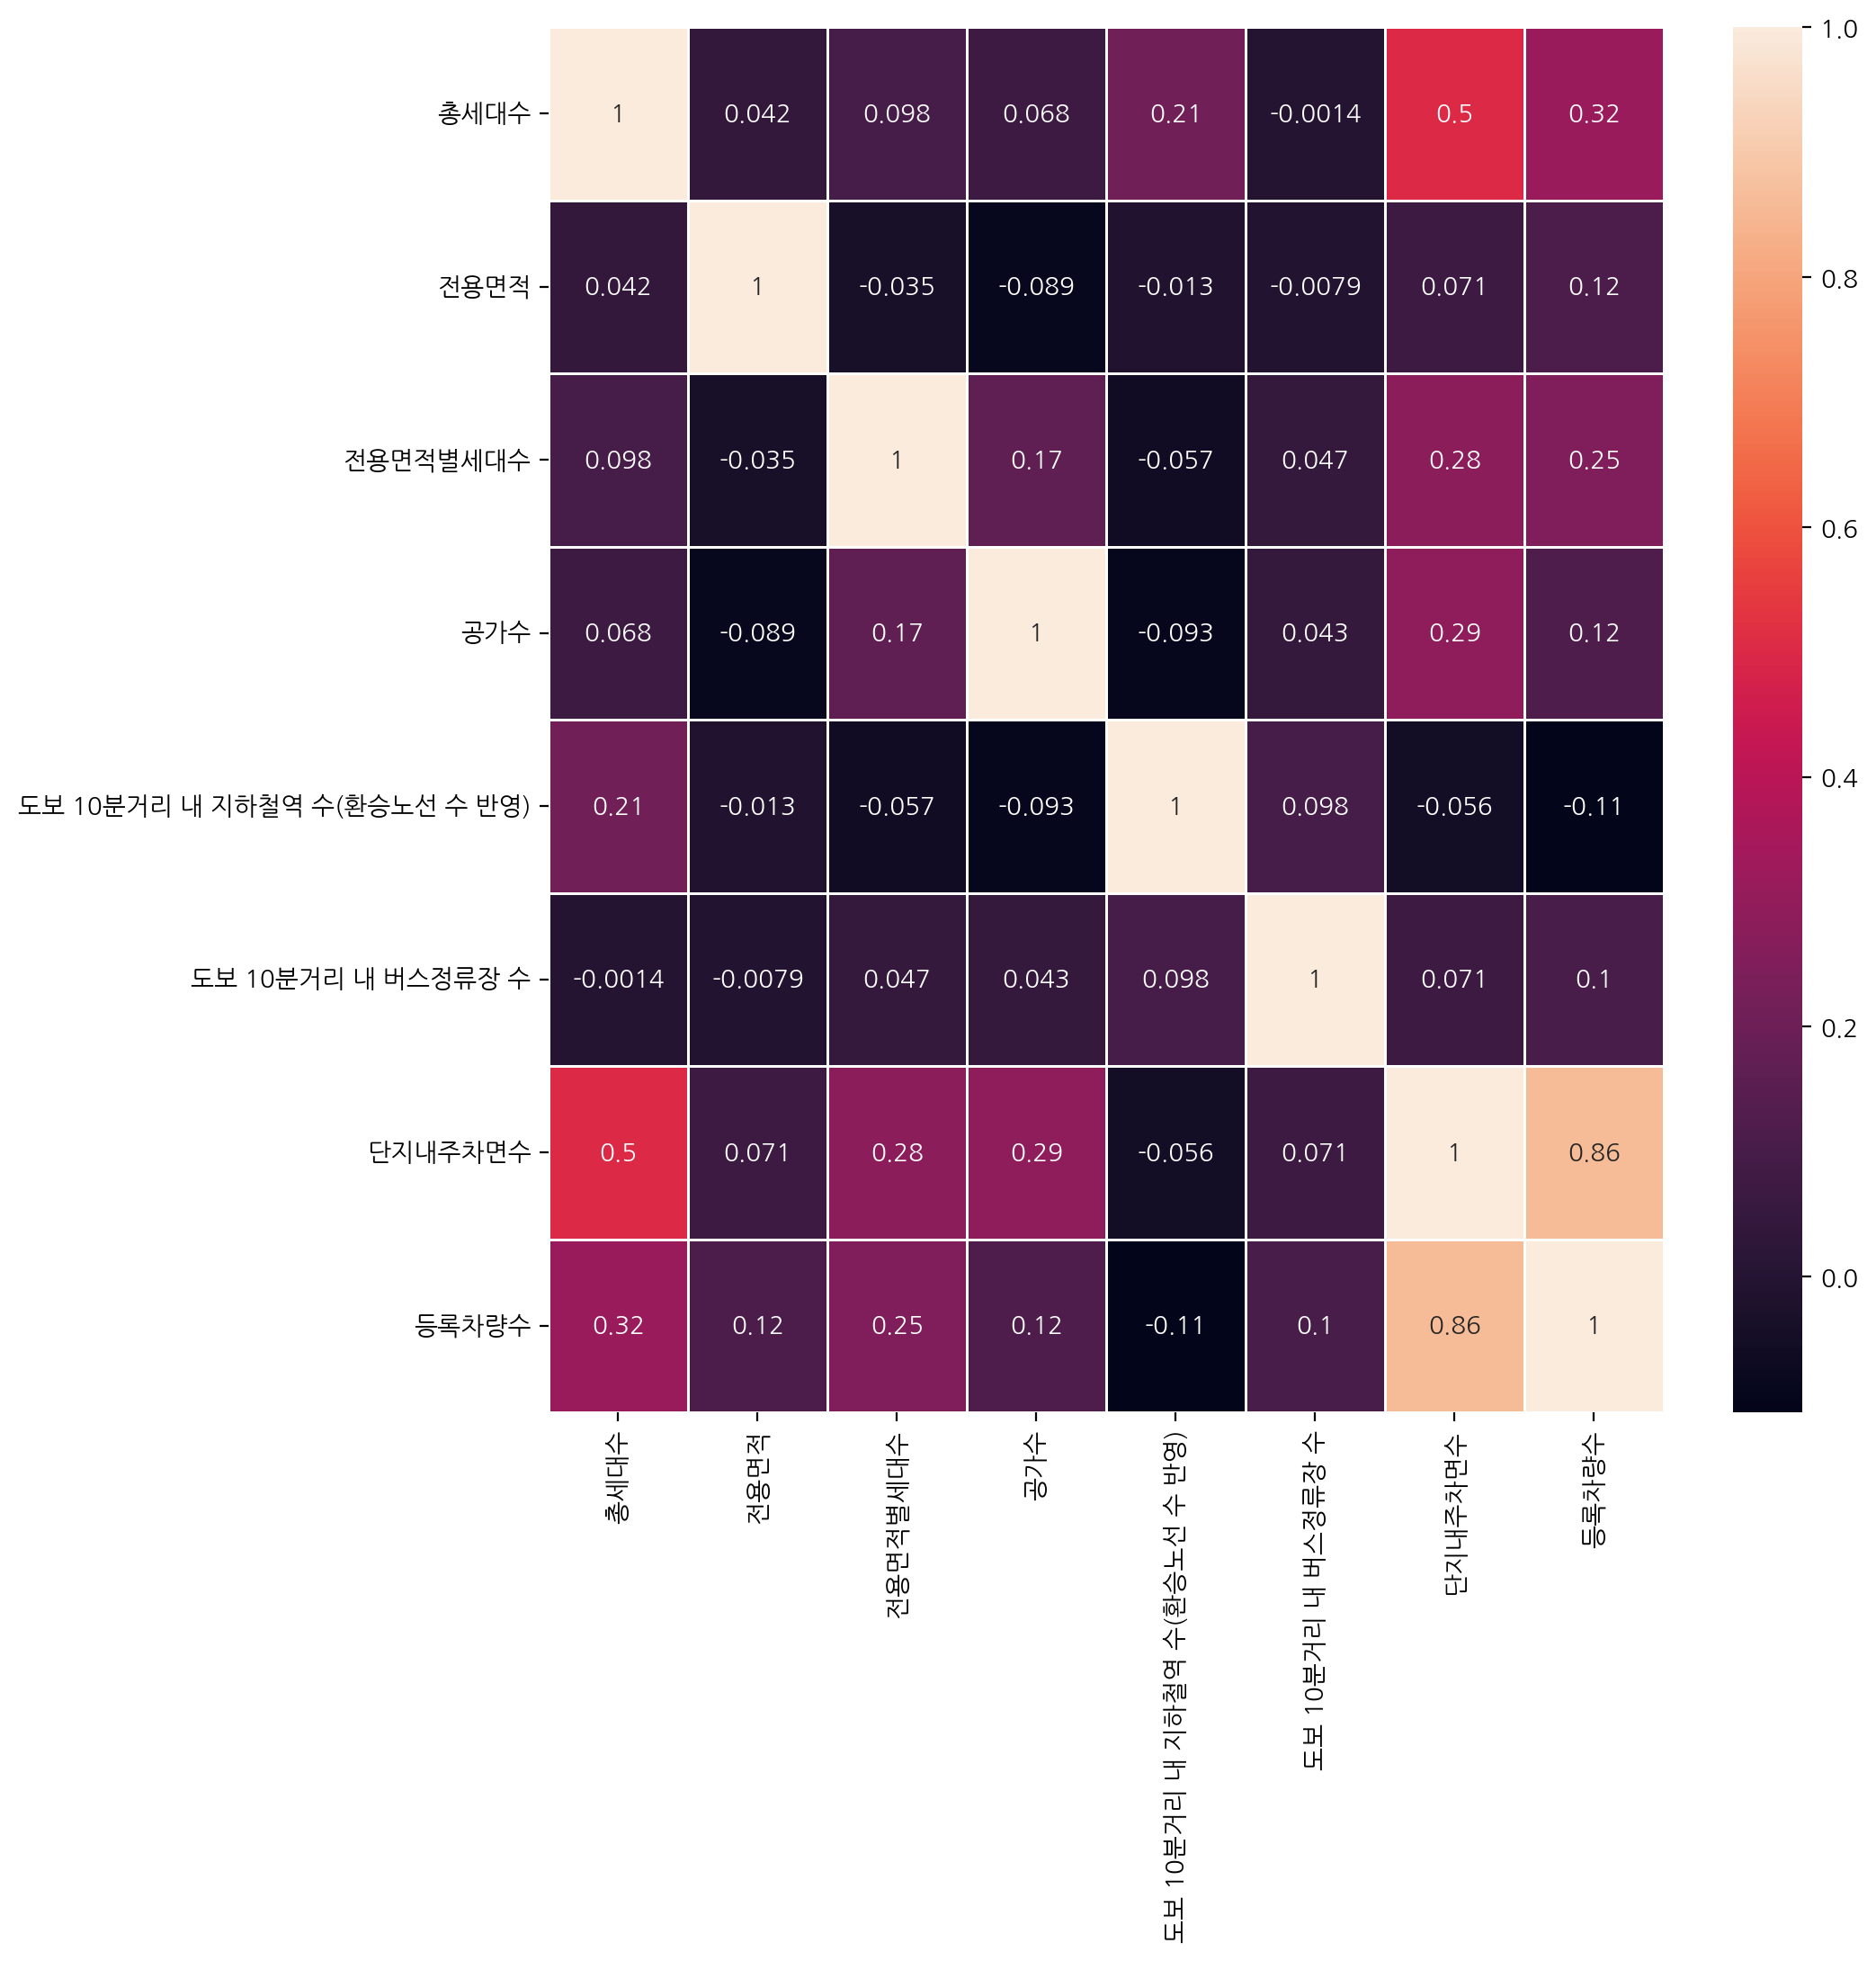

In [16]:
# 상관계수
corr_matrix = train.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, linewidth=1)
#단지 내에 주차 차량수랑 등록 차량수가 가장 많은걸 알 수 있음

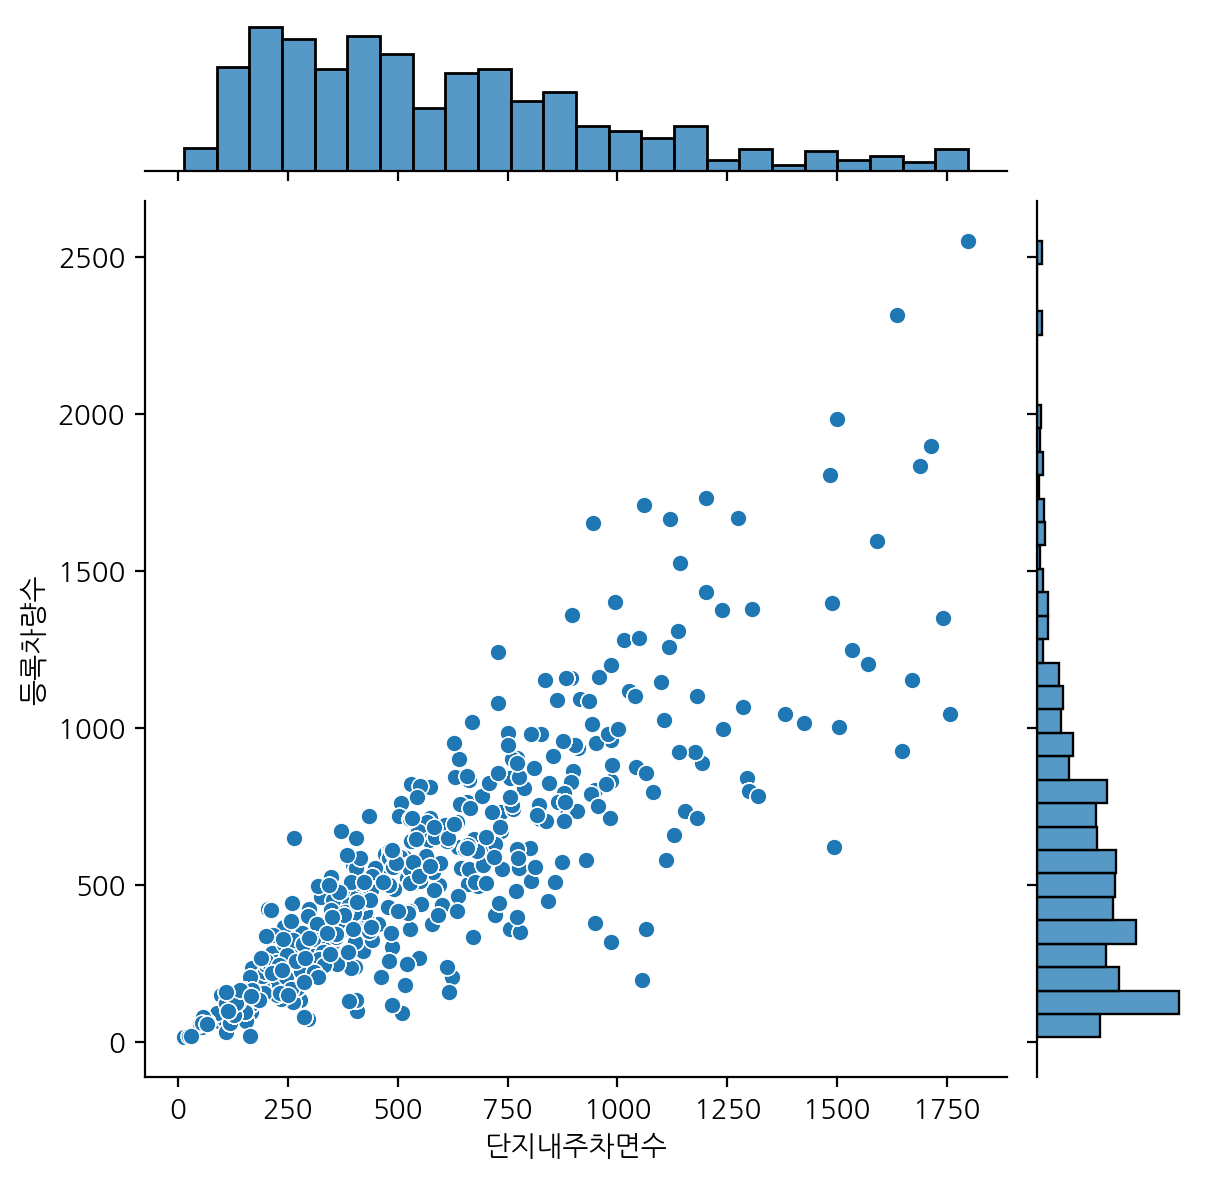

In [17]:
sns.jointplot(x="단지내주차면수", y="등록차량수", data=train, kind='scatter')

In [18]:
train[~train.index.duplicated()]

,단지코드,총세대수,임대건물구분,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
지역,,,,,,,,,,,,,,
경상북도,C2483,900,아파트,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
경상남도,C2515,545,아파트,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
대전광역시,C1407,1216,아파트,국민임대,30.95,288,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
경기도,C1945,755,아파트,국민임대,39.72,120,6.0,B,15607000,130070,1.0,3.0,734.0,730.0
전라북도,C1470,696,아파트,국민임대,36.55,228,14.0,A,12015000,102130,0.0,2.0,645.0,553.0
강원도,C2073,361,아파트,국민임대,39.63,94,13.0,A,10813000,144180,0.0,5.0,288.0,301.0
광주광역시,C2513,754,아파트,국민임대,51.88,517,15.0,A,32443000,192250,0.0,6.0,530.0,820.0
충청남도,C1312,518,아파트,국민임대,39.72,60,12.0,A,17460000,122210,NaN,3.0,527.0,359.0
부산광역시,C2650,875,아파트,국민임대,36.44,557,13.0,A,11492000,104930,0.0,4.0,616.0,159.0


In [19]:
# 중복값을 확인해 보았으나 전용면적이 다른것을 알 수 있었음 삭제 하면 안됨
train[train.duplicated()]

,단지코드,총세대수,임대건물구분,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
지역,,,,,,,,,,,,,,
대전광역시,C1407,1216,아파트,국민임대,41.58,70,13.0,A,27637000,164610,1.0,1.0,1285.0,1064.0
대전광역시,C1407,1216,아파트,국민임대,46.36,170,13.0,A,36048000,198250,1.0,1.0,1285.0,1064.0
대전광역시,C1407,1216,아파트,국민임대,51.24,62,13.0,A,42056000,253520,1.0,1.0,1285.0,1064.0
경기도,C1945,755,아파트,국민임대,39.72,120,6.0,B,15607000,130070,1.0,3.0,734.0,730.0
경기도,C1244,1722,아파트,국민임대,46.81,76,10.0,A,43990000,304540,0.0,10.0,1483.0,1804.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
울산광역시,C1803,100,아파트,행복주택,26.26,6,13.0,J,34400000,163680,0.0,2.0,57.0,78.0
울산광역시,C1803,100,아파트,행복주택,36.16,8,13.0,J,46400000,220780,0.0,2.0,57.0,78.0
울산광역시,C1803,100,아파트,행복주택,36.16,9,13.0,J,46400000,220780,0.0,2.0,57.0,78.0


In [20]:
train.describe()

,총세대수,전용면적,전용면적별세대수,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
count,2952.000000,2952.000000,2952.000000,2952.000000,2741.000000,2948.000000,2952.000000,2952.000000
mean,886.661247,44.757215,102.747967,12.921070,0.176578,3.695726,601.668360,559.768293
std,513.540168,31.874280,132.640159,10.778831,0.427408,2.644665,396.407072,433.375027
min,26.000000,12.620000,1.000000,0.000000,0.000000,0.000000,13.000000,13.000000
25%,513.500000,32.100000,14.000000,4.000000,0.000000,2.000000,279.250000,220.000000
50%,779.000000,39.930000,60.000000,11.000000,0.000000,3.000000,517.000000,487.000000
75%,1106.000000,51.562500,144.000000,20.000000,0.000000,4.000000,823.000000,770.000000
max,2568.000000,583.400000,1865.000000,55.000000,3.000000,20.000000,1798.000000,2550.000000


In [21]:
train.nunique().describe()

count     14.000000
mean     329.500000
std      347.047935
min        2.000000
25%       15.500000
50%      352.500000
75%      418.000000
max      995.000000
dtype: float64

# 결측값 확인

In [22]:
train.isnull().sum() #-> 각 column별로 null값의 개수 더해서 알려줌
train.isnull().sum().sum() #-> 전체 데이터프레임의 null값의 개수 

1353

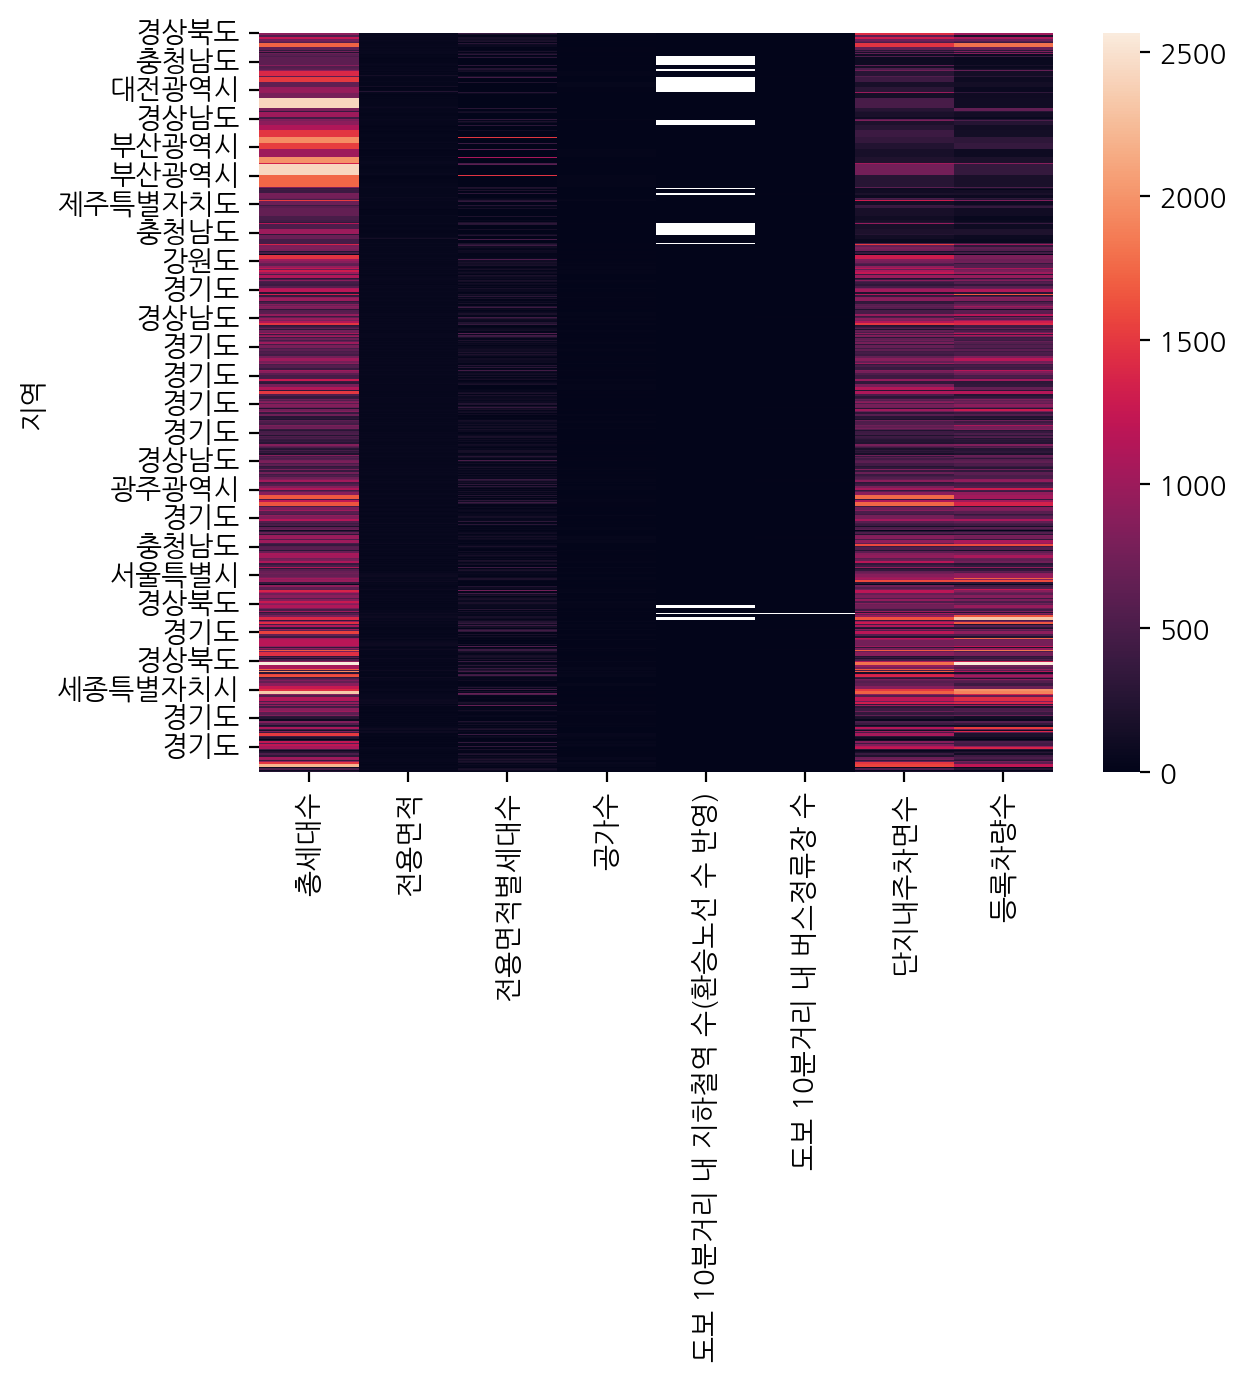

In [23]:
sns.heatmap(train.select_dtypes(include="number"));

In [24]:
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull().sum()

211

<Axes: xlabel='도보 10분거리 내 지하철역 수(환승노선 수 반영)', ylabel='count'>

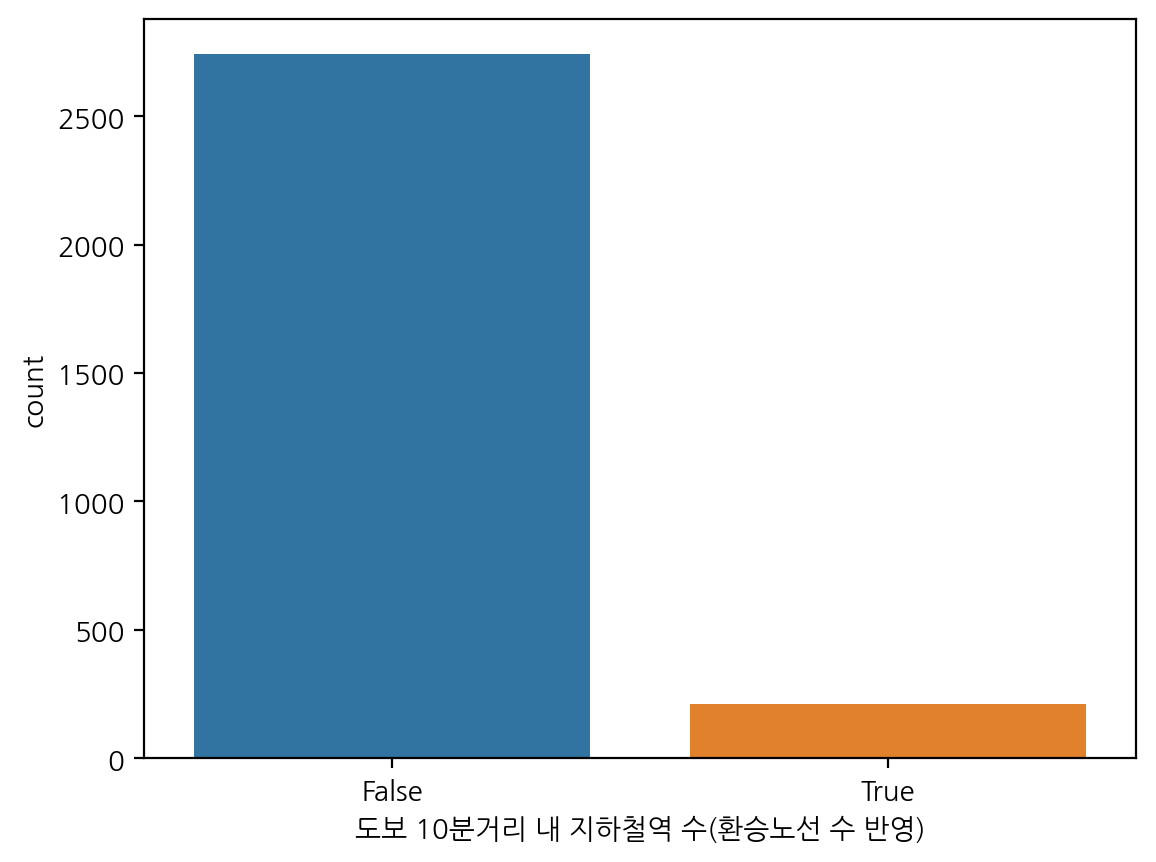

In [25]:
sns.countplot(x=train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull())

<Axes: xlabel='도보 10분거리 내 지하철역 수(환승노선 수 반영)', ylabel='count'>

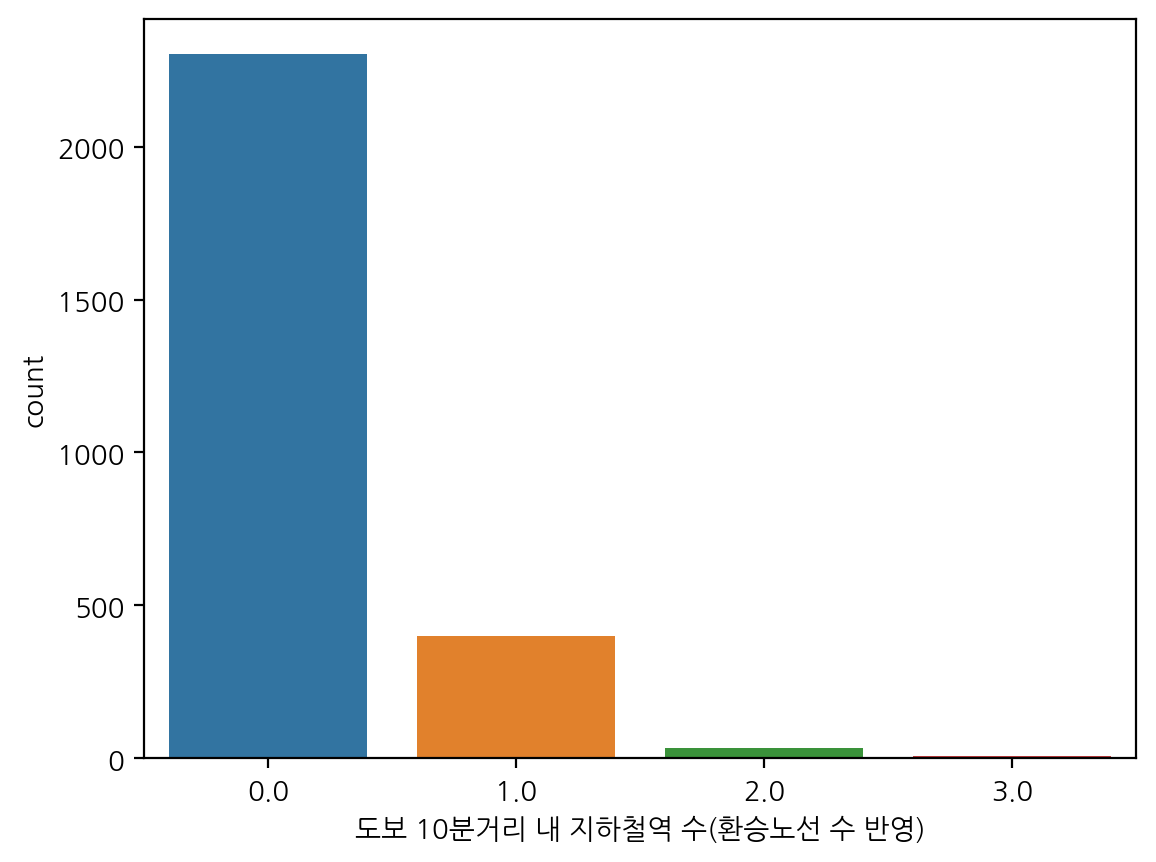

In [26]:
sns.countplot(x=train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'])

In [27]:
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull().describe()

count      2952
unique        2
top       False
freq       2741
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: object

In [28]:
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()

지역
경상북도    False
경상북도    False
경상북도    False
경상북도    False
경상북도    False
        ...  
강원도     False
강원도     False
강원도     False
강원도     False
강원도     False
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), Length: 2952, dtype: bool

In [29]:
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].unique()

array([ 0.,  1., nan,  2.,  3.])

In [30]:
train[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]

,단지코드,총세대수,임대건물구분,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
지역,,,,,,,,,,,,,,
충청남도,C1312,518,아파트,국민임대,39.72,60,12.0,A,17460000,122210,NaN,3.0,527.0,359.0
충청남도,C1312,518,아파트,국민임대,39.98,89,12.0,A,17460000,122210,NaN,3.0,527.0,359.0
충청남도,C1312,518,아파트,국민임대,41.55,225,12.0,A,19954000,130940,NaN,3.0,527.0,359.0
충청남도,C1312,518,아파트,국민임대,46.90,143,12.0,A,28687000,149660,NaN,3.0,527.0,359.0
충청남도,C1874,619,아파트,영구임대,26.37,294,2.0,C,3141000,69900,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
대전광역시,C1350,1401,아파트,공공임대(10년),59.91,13,2.0,A,37474000,519350,NaN,6.0,1636.0,2315.0
대전광역시,C1350,1401,아파트,공공임대(10년),59.92,223,2.0,A,37385000,516130,NaN,6.0,1636.0,2315.0
대전광역시,C1350,1401,아파트,공공임대(분납),51.99,146,2.0,A,54612000,131130,NaN,6.0,1636.0,2315.0


In [61]:
# 모든 NaN 0 으로 변경
train.fillna(0, inplace=True)

In [32]:
train.isnull().sum()

단지코드                            0
총세대수                            0
임대건물구분                          0
공급유형                            0
전용면적                            0
전용면적별세대수                        0
공가수                             0
자격유형                            0
임대보증금                           0
임대료                             0
도보 10분거리 내 지하철역 수(환승노선 수 반영)    0
도보 10분거리 내 버스정류장 수              0
단지내주차면수                         0
등록차량수                           0
dtype: int64

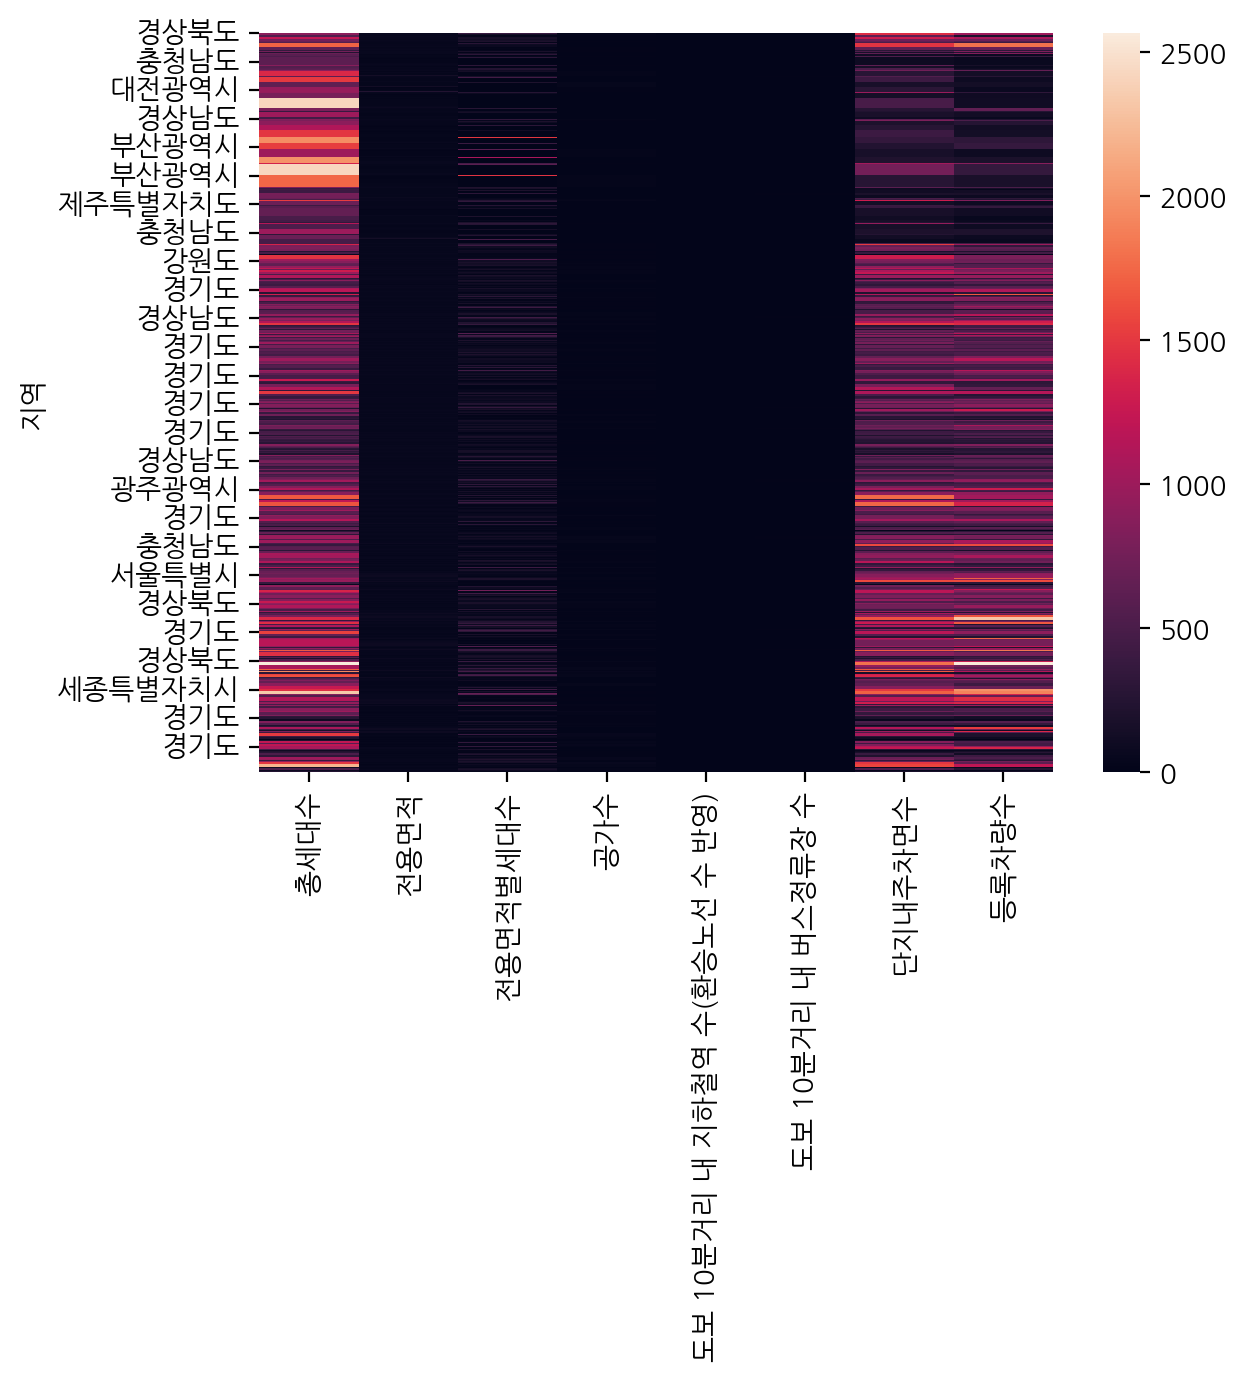

In [33]:
sns.heatmap(train.select_dtypes(include="number"));

# age_gender 확인

In [34]:
#지역 임대주택 나이별, 성별 인구 분포
age_gender

,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
지역,,,,,,,,,,,,,,,,,,,,,
경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,...,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,...,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,...,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013
강원도,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,...,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
광주광역시,0.031994,0.034566,0.049851,0.050254,0.065084,0.066875,0.066888,0.064416,0.080028,0.079183,...,0.075930,0.059586,0.048552,0.031754,0.029749,0.010341,0.006343,0.000895,0.000353,0.000013
충청남도,0.031369,0.031711,0.059077,0.062422,0.067975,0.072622,0.065095,0.067303,0.078860,0.073418,...,0.070278,0.057692,0.042296,0.028682,0.024514,0.010900,0.005429,0.001549,0.000219,0.000123
부산광역시,0.022003,0.022947,0.032681,0.035512,0.053796,0.057233,0.047049,0.048866,0.061952,0.060769,...,0.109297,0.085294,0.078743,0.053388,0.047908,0.020228,0.008043,0.002240,0.000268,0.000028


In [35]:
age_gender.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 경상북도 to 세종특별자치시
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   10대미만(여자)  16 non-null     float64
 1   10대미만(남자)  16 non-null     float64
 2   10대(여자)    16 non-null     float64
 3   10대(남자)    16 non-null     float64
 4   20대(여자)    16 non-null     float64
 5   20대(남자)    16 non-null     float64
 6   30대(여자)    16 non-null     float64
 7   30대(남자)    16 non-null     float64
 8   40대(여자)    16 non-null     float64
 9   40대(남자)    16 non-null     float64
 10  50대(여자)    16 non-null     float64
 11  50대(남자)    16 non-null     float64
 12  60대(여자)    16 non-null     float64
 13  60대(남자)    16 non-null     float64
 14  70대(여자)    16 non-null     float64
 15  70대(남자)    16 non-null     float64
 16  80대(여자)    16 non-null     float64
 17  80대(남자)    16 non-null     float64
 18  90대(여자)    16 non-null     float64
 19  90대(남자)    16 non-null     float64
 20  100대(여자) 

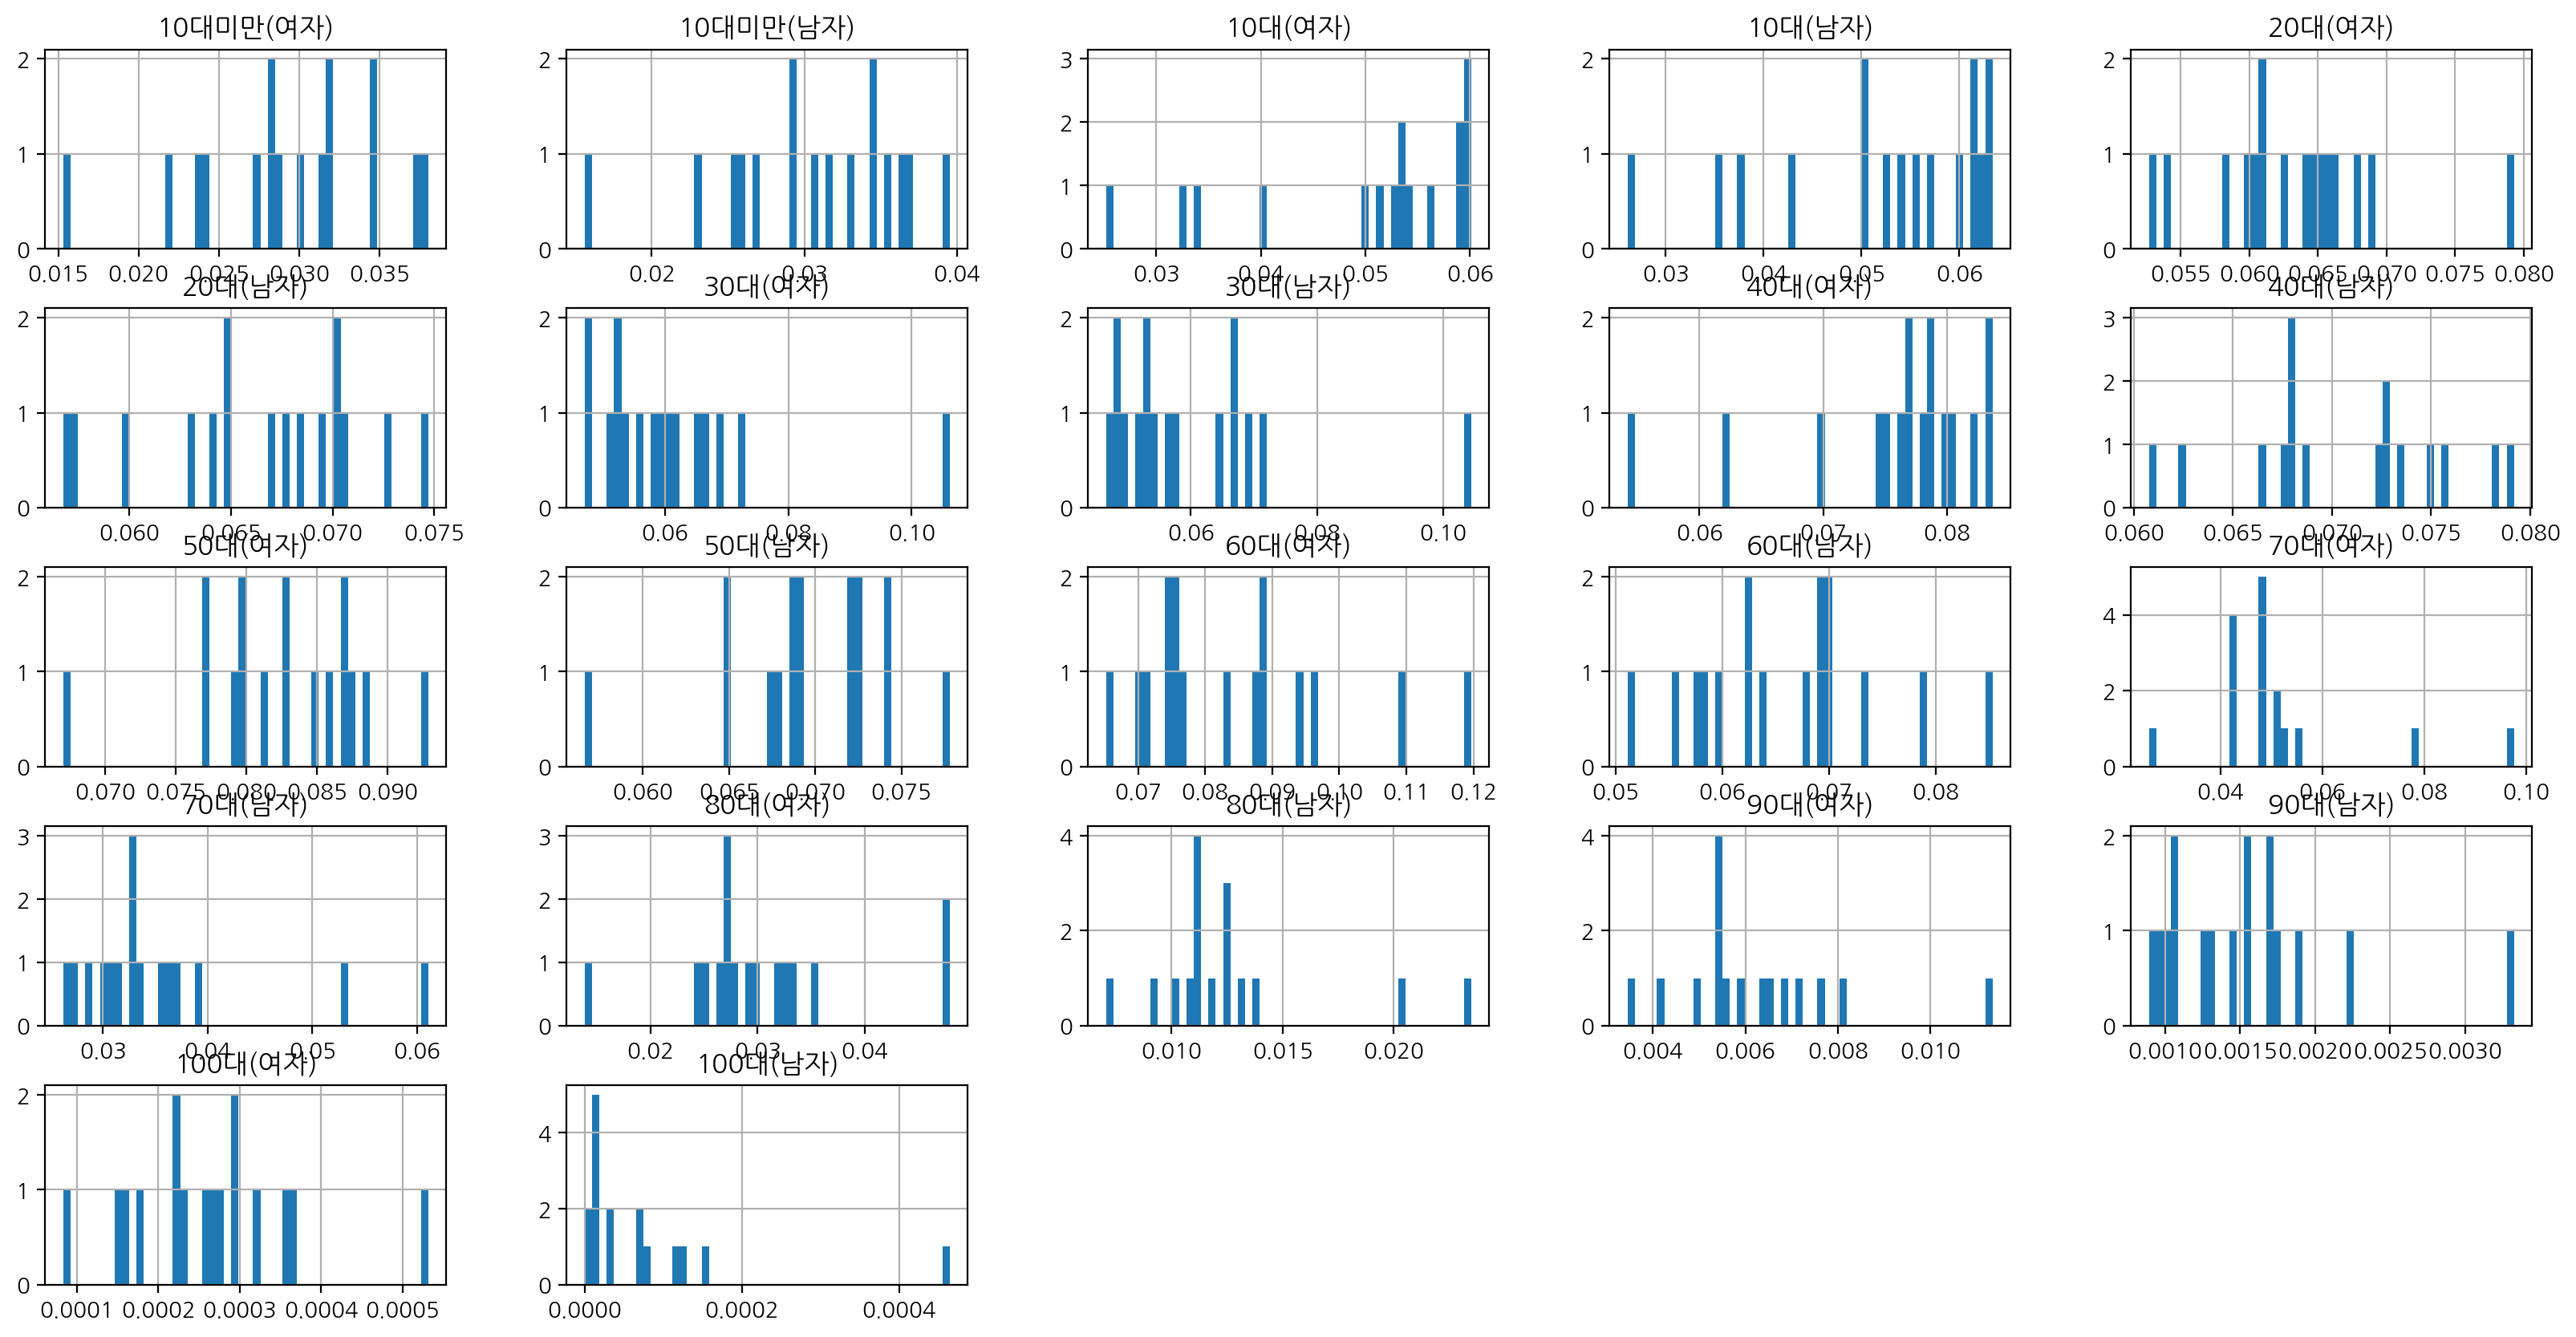

In [36]:
age_gender.hist(bins=50,figsize=(20, 10))
plt.show();


In [37]:
# test에 지역에 서울이 없음

test.dtypes, test.isnull().sum()

(단지코드                             object
 총세대수                              int64
 임대건물구분                           object
 공급유형                             object
 전용면적                            float64
 전용면적별세대수                          int64
 공가수                             float64
 자격유형                             object
 임대보증금                            object
 임대료                              object
 도보 10분거리 내 지하철역 수(환승노선 수 반영)    float64
 도보 10분거리 내 버스정류장 수              float64
 단지내주차면수                         float64
 dtype: object,
 단지코드                              0
 총세대수                              0
 임대건물구분                            0
 공급유형                              0
 전용면적                              0
 전용면적별세대수                          0
 공가수                               0
 자격유형                              2
 임대보증금                           180
 임대료                             180
 도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
 도보 10분거리 내 버스정류장 수                0
 단지내주차면

In [77]:
#3) 오류 데이터 제거

error_data = ['C2085', 'C1397', 'C2431', 'C1649', 'C1095', 'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988']

for error in error_data:
    error_index = train[train['단지코드'] == error].index
    train.drop(error_index, inplace=True)


In [78]:
error_data = ['C2085', 'C1397', 'C2431', 'C1649', 'C1095', 'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988']

for error in error_data:
    error_index = test[test['단지코드'] == error].index
    test.drop(error_index, inplace=True)

In [64]:
train.shape,test.shape

((1545, 14), (1022, 13))

In [65]:
train

,단지코드,총세대수,임대건물구분,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
지역,,,,,,,,,,,,,,
대전광역시,C1407,1216,아파트,국민임대,30.95,288,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
대전광역시,C1407,1216,아파트,국민임대,30.99,68,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
대전광역시,C1407,1216,아파트,국민임대,30.99,34,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
대전광역시,C1407,1216,아파트,국민임대,41.11,148,13.0,A,27637000,164610,1.0,1.0,1285.0,1064.0
대전광역시,C1407,1216,아파트,국민임대,41.39,74,13.0,A,27637000,164610,1.0,1.0,1285.0,1064.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
강원도,C2532,239,아파트,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
강원도,C2532,239,아파트,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
강원도,C2532,239,아파트,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0


In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1545 entries, 대전광역시 to 강원도
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1545 non-null   object 
 1   총세대수                          1545 non-null   int64  
 2   임대건물구분                        1545 non-null   object 
 3   공급유형                          1545 non-null   object 
 4   전용면적                          1545 non-null   float64
 5   전용면적별세대수                      1545 non-null   int64  
 6   공가수                           1545 non-null   float64
 7   자격유형                          1545 non-null   object 
 8   임대보증금                         1545 non-null   object 
 9   임대료                           1545 non-null   object 
 10  도보 10분거리 내 지하철역 수(환승노선 수 반영)  1545 non-null   float64
 11  도보 10분거리 내 버스정류장 수            1545 non-null   float64
 12  단지내주차면수                       1545 non-null   float64
 13  등록차량수

In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1022 entries, 경기도 to 전라북도
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   공급유형                          1022 non-null   object 
 4   전용면적                          1022 non-null   float64
 5   전용면적별세대수                      1022 non-null   int64  
 6   공가수                           1022 non-null   float64
 7   자격유형                          1020 non-null   object 
 8   임대보증금                         842 non-null    object 
 9   임대료                           842 non-null    object 
 10  도보 10분거리 내 지하철역 수(환승노선 수 반영)  980 non-null    float64
 11  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 12  단지내주차면수                       1022 non-null   float64
dtypes: flo

# 데이테셋 나누기

In [69]:
label_name="등록차량수"
feature_names = train.drop(columns = "등록차량수").columns
X = train.drop(columns=label_name)
y = train[label_name]

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, test_size=0.1, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

ValueError: ignored

# 오토 ML 사용

In [48]:
# 우선 다운로드
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
import pandas as pd
# 저희는 Tabular Data를 다루기 때문에 아래 라이브러리를 호출합니다.
from autogluon.tabular import TabularDataset, TabularPredictor

In [80]:
train_df = TabularDataset(train)
test_df = TabularDataset(test)

In [83]:
# 이렇게 한 줄만 작성하면 내부에서 알아서 학습해줍니다.
predictor = TabularPredictor(label='등록차량수', eval_metric='f1_macro').fit(train)


No path specified. Models will be saved in: "AutogluonModels/ag-20230403_015623/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230403_015623/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    1545
Train Data Columns: 13
Label Column: 등록차량수
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (2315.0, 16.0, 468.36764, 395.79257)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10695.05 MB
	Tr

[1000]	valid_set's l2: 3906.7	valid_set's f1_macro: 0.0245687


		Classification metrics can't handle a mix of multiclass and continuous targets
Detailed Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 1525, in _train_and_save
    score = model.score_with_y_pred_proba(y=y_val, y_pred_proba=y_pred_proba_val, sample_weight=w_val)
  File "/usr/local/lib/python3.9/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 865, in score_with_y_pred_proba
    return compute_weighted_metric(y, y_pred, metric, sample_weight, quantile_levels=self.quantile_levels)
  File "/usr/local/lib/python3.9/dist-packages/autogluon/core/utils/utils.py", line 627, in compute_weighted_metric
    return metric(y, y_pred, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/autogluon/core/metrics/__init__.py", line 94, in __call__
    return self._score(y_true=y_true, y_pred=y_pred, **k)
  File "/usr/local/lib/python3.9/dist-packages/autogluon/core/metrics/__init__.

[1000]	valid_set's l2: 1104.69	valid_set's f1_macro: 0.0619705


		Classification metrics can't handle a mix of multiclass and continuous targets
Detailed Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 1525, in _train_and_save
    score = model.score_with_y_pred_proba(y=y_val, y_pred_proba=y_pred_proba_val, sample_weight=w_val)
  File "/usr/local/lib/python3.9/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 865, in score_with_y_pred_proba
    return compute_weighted_metric(y, y_pred, metric, sample_weight, quantile_levels=self.quantile_levels)
  File "/usr/local/lib/python3.9/dist-packages/autogluon/core/utils/utils.py", line 627, in compute_weighted_metric
    return metric(y, y_pred, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/autogluon/core/metrics/__init__.py", line 94, in __call__
    return self._score(y_true=y_true, y_pred=y_pred, **k)
  File "/usr/local/lib/python3.9/dist-packages/autogluon/core/metrics/__init__.

[1000]	valid_set's l2: 1029.83	valid_set's f1_macro: 0.103605


		Classification metrics can't handle a mix of multiclass and continuous targets
Detailed Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 1525, in _train_and_save
    score = model.score_with_y_pred_proba(y=y_val, y_pred_proba=y_pred_proba_val, sample_weight=w_val)
  File "/usr/local/lib/python3.9/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 865, in score_with_y_pred_proba
    return compute_weighted_metric(y, y_pred, metric, sample_weight, quantile_levels=self.quantile_levels)
  File "/usr/local/lib/python3.9/dist-packages/autogluon/core/utils/utils.py", line 627, in compute_weighted_metric
    return metric(y, y_pred, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/autogluon/core/metrics/__init__.py", line 94, in __call__
    return self._score(y_true=y_true, y_pred=y_pred, **k)
  File "/usr/local/lib/python3.9/dist-packages/autogluon/core/metrics/__init__.

ValueError: ignored